In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyfonts import load_google_font

In [2]:
def time_to_unit(time_str: str, unit: str = "seconds") -> float:
    """
    Convert a time string like '5h:34m:27s' into the specified unit.

    Args:
        time_str: Time in format like '5h:34m:27s'
        unit: Target unit - 'seconds', 'minutes', or 'hours'

    Returns:
        float: Time converted into the specified unit
    """

    hours = minutes = seconds = 0

    if "h" in time_str:
        hours = int(time_str.split("h")[0])
        time_str = time_str.split("h", 1)[1]
    if "m" in time_str:
        minutes = int(time_str.split("m")[0].split(":")[-1])
        time_str = time_str.split("m", 1)[1]
    if "s" in time_str:
        seconds = int(time_str.split("s")[0].split(":")[-1])

    total_seconds = hours * 3600 + minutes * 60 + seconds

    if unit.lower() == "seconds":
        return total_seconds
    elif unit.lower() == "minutes":
        return total_seconds / 60
    elif unit.lower() == "hours":
        return total_seconds / 3600
    else:
        raise ValueError("Invalid unit. Choose 'seconds', 'minutes', or 'hours'.")

In [3]:
ncores2 = {
    "run10": ["5h:34m:27s", "5h:0m:46s"],
    "run1": ["5h:31m:55s", "5h:0m:48s"],
    "run2": ["5h:33m:27s", "5h:5m:30s"],
    "run3": ["5h:33m:36s", "5h:5m:43s"],
    "run4": ["5h:32m:33s", "4h:59m:59s"],
    "run5": ["5h:32m:22s", "5h:0m:24s"],
    "run6": ["5h:31m:28s", "5h:1m:15s"],
    "run7": ["5h:32m:19s", "5h:1m:25s"],
    "run8": ["5h:31m:30s", "5h:0m:46s"],
    "run9": ["5h:34m:34s", "5h:0m:42s"],
}

ncores4 = {
    "run10": ["2h:57m:57s", "2h:47m:29s"],
    "run1": ["2h:58m:36s", "2h:44m:13s"],
    "run2": ["2h:58m:27s", "2h:46m:55s"],
    "run3": ["2h:56m:5s", "2h:46m:49s"],
    "run4": ["2h:56m:5s", "2h:46m:55s"],
    "run5": ["2h:56m:49s", "2h:44m:13s"],
    "run6": ["2h:58m:43s", "2h:45m:57s"],
    "run7": ["2h:58m:21s", "2h:47m:25s"],
    "run8": ["2h:57m:7s", "2h:47m:25s"],
    "run9": ["2h:57m:5s", "2h:47m:28s"],
}

ncores8 = {
    "run10": ["1h:47m:14s", "1h:38m:36s"],
    "run1": ["1h:47m:38s", "1h:38m:38s"],
    "run2": ["1h:47m:46s", "1h:38m:16s"],
    "run3": ["1h:47m:18s", "1h:38m:33s"],
    "run4": ["1h:46m:37s", "1h:38m:16s"],
    "run5": ["1h:46m:19s", "1h:38m:43s"],
    "run6": ["1h:47m:10s", "1h:38m:46s"],
    "run7": ["1h:46m:55s", "1h:38m:43s"],
    "run8": ["1h:46m:57s", "1h:38m:24s"],
    "run9": ["1h:46m:40s", "1h:38m:53s"],
}

ncores16 = {
    "run10": ["1h:11m:43s", "1h:8m:5s"],
    "run1": ["1h:10m:47s", "1h:9m:35s"],
    "run2": ["1h:12m:27s", "1h:9m:10s"],
    "run3": ["1h:11m:31s", "1h:9m:46s"],
    "run4": ["1h:12m:8s", "1h:9m:7s"],
    "run5": ["1h:12m:38s", "1h:8m:37s"],
    "run6": ["1h:12m:20s", "1h:8m:37s"],
    "run7": ["1h:12m:5s", "1h:8m:8s"],
    "run8": ["1h:12m:2s", "1h:8m:20s"],
    "run9": ["1h:11m:59s", "1h:8m:25s"],
}

ncores32 = {
    "run10": ["1h:12m:36s", "0h:57m:19s"],
    "run1": ["1h:11m:52s", "1h:0m:35s"],
    "run2": ["1h:12m:4s", "0h:58m:2s"],
    "run3": ["1h:11m:43s", "0h:57m:28s"],
    "run4": ["1h:11m:51s", "0h:57m:54s"],
    "run5": ["1h:12m:1s", "0h:57m:26s"],
    "run6": ["1h:11m:28s", "0h:59m:28s"],
    "run7": ["1h:12m:15s", "0h:58m:35s"],
    "run8": ["1h:12m:25s", "0h:59m:3s"],
    "run9": ["1h:12m:49s", "0h:58m:27s"],
}


timedata = []

for dictio, cores in zip([ncores2, ncores4, ncores8, ncores16, ncores32], [2, 4, 8, 16, 32]):
    df = (
        pd.DataFrame.from_dict(dictio, orient="index")
        .reset_index(names=["Replicate"])
        .rename(columns={0: "ProteinLeg", 1: "WaterLeg"})
        .assign(Cores=cores)
    )
    timedata.append(df)


timedata = pd.concat(timedata, ignore_index=True)
timedata = timedata.assign(
    p_total_seconds=timedata["ProteinLeg"].apply(lambda x: time_to_unit(x, "seconds")),
    p_total_minutes=timedata["ProteinLeg"].apply(lambda x: time_to_unit(x, "minutes")),
    p_total_hours=timedata["ProteinLeg"].apply(lambda x: time_to_unit(x, "hours")),
    w_total_seconds=timedata["WaterLeg"].apply(lambda x: time_to_unit(x, "seconds")),
    w_total_minutes=timedata["WaterLeg"].apply(lambda x: time_to_unit(x, "minutes")),
    w_total_hours=timedata["WaterLeg"].apply(lambda x: time_to_unit(x, "hours")),
)

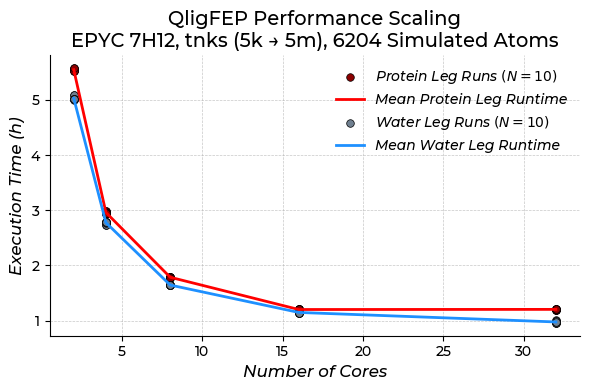

In [4]:
tick_font = load_google_font("Montserrat", weight=500)
label_font = load_google_font("Montserrat", weight=500, italic=True)
title_font = load_google_font("Montserrat", weight=500)

n_atoms = 6619
excluded_atoms = 415
total_n_atoms = n_atoms - excluded_atoms


def set_font_properties(ax, tick_font=tick_font, label_font=label_font, title_font=title_font):
    ax.set_xlabel(ax.get_xlabel(), fontproperties=label_font, size=12)
    ax.set_ylabel(ax.get_ylabel(), fontproperties=label_font, size=12)
    ax.set_title(ax.get_title(), fontproperties=title_font, size=14)
    for label in ax.get_xticklabels():
        label.set_fontproperties(tick_font)
        label.set_fontsize(10)
    for label in ax.get_yticklabels():
        label.set_fontproperties(tick_font)
        label.set_fontsize(10)
    ax.legend(prop=label_font, frameon=False)


fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(
    timedata["Cores"],
    timedata["p_total_hours"],
    color="darkred",
    alpha=1,
    s=30,
    label="Protein Leg Runs $(N=10)$",
    edgecolors="black",
    linewidth=0.5,
)
agg_df = timedata.groupby("Cores")["p_total_hours"].agg(Mean="mean").reset_index()
ax.plot(agg_df["Cores"], agg_df["Mean"], color="red", lw=2, markersize=6, label="Mean Protein Leg Runtime")

ax.scatter(
    timedata["Cores"],
    timedata["w_total_hours"],
    color="slategray",
    alpha=1,
    s=30,
    label="Water Leg Runs $(N=10)$",
    edgecolors="black",
    linewidth=0.5,
)
agg_df = timedata.groupby("Cores")["w_total_hours"].agg(Mean="mean").reset_index()
ax.plot(
    agg_df["Cores"], agg_df["Mean"], color="dodgerblue", lw=2, markersize=6, label="Mean Water Leg Runtime"
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_axisbelow(True)
ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_xlabel("Number of Cores")
ax.set_ylabel("Execution Time (h)")
ax.set_title(f"QligFEP Performance Scaling\nEPYC 7H12, tnks (5k → 5m), {total_n_atoms} Simulated Atoms")

# ax.set_ylim(1, 6)
set_font_properties(ax)  # set all the properties
plt.tight_layout()

fig = plt.gcf()
fig.savefig("figures/runtime_efficiency.png", dpi=300, bbox_inches="tight")
fig.savefig("figures/runtime_efficiency.svg", bbox_inches="tight")

plt.show()

In [5]:
import pandas as pd
import numpy as np

# Your existing data processing code here...
# (assuming timedata DataFrame is already created)


def calculate_performance_metrics(timedata):
    """
    Calculate comprehensive performance metrics for parallel scaling analysis
    """

    # Group by cores and calculate statistics
    protein_stats = (
        timedata.groupby("Cores")["p_total_hours"].agg(["mean", "std", "min", "max", "count"]).reset_index()
    )
    protein_stats.columns = [
        "Cores",
        "Mean_Protein",
        "Std_Protein",
        "Min_Protein",
        "Max_Protein",
        "N_Protein",
    ]

    water_stats = (
        timedata.groupby("Cores")["w_total_hours"].agg(["mean", "std", "min", "max", "count"]).reset_index()
    )
    water_stats.columns = ["Cores", "Mean_Water", "Std_Water", "Min_Water", "Max_Water", "N_Water"]

    # Merge statistics
    stats = pd.merge(protein_stats, water_stats, on="Cores")

    # Calculate speedup and efficiency (using 2-core as baseline)
    baseline_protein = stats[stats["Cores"] == 2]["Mean_Protein"].iloc[0]
    baseline_water = stats[stats["Cores"] == 2]["Mean_Water"].iloc[0]

    stats["Speedup_Protein"] = baseline_protein / stats["Mean_Protein"]
    stats["Speedup_Water"] = baseline_water / stats["Mean_Water"]

    # Parallel efficiency (speedup / number of cores relative to baseline)
    stats["Efficiency_Protein"] = stats["Speedup_Protein"] / (stats["Cores"] / 2)
    stats["Efficiency_Water"] = stats["Speedup_Water"] / (stats["Cores"] / 2)

    # Performance improvement from previous core count
    stats["Improvement_Protein"] = stats["Mean_Protein"].shift(1) / stats["Mean_Protein"] - 1
    stats["Improvement_Water"] = stats["Mean_Water"].shift(1) / stats["Mean_Water"] - 1

    return stats


def generate_summary_table(stats):
    """
    Generate a publication-ready summary table with cost-benefit analysis
    """
    # Calculate core-hours (total computational cost)
    stats["Core_Hours_Protein"] = stats["Mean_Protein"] * stats["Cores"]
    stats["Core_Hours_Water"] = stats["Mean_Water"] * stats["Cores"]

    # Cost-efficiency ratio (lower is better)
    baseline_core_hours_protein = stats[stats["Cores"] == 2]["Core_Hours_Protein"].iloc[0]
    baseline_core_hours_water = stats[stats["Cores"] == 2]["Core_Hours_Water"].iloc[0]

    stats["Cost_Efficiency_Protein"] = stats["Core_Hours_Protein"] / baseline_core_hours_protein
    stats["Cost_Efficiency_Water"] = stats["Core_Hours_Water"] / baseline_core_hours_water

    summary = pd.DataFrame(
        {
            "Cores": stats["Cores"],
            "Protein Runtime (h)": stats["Mean_Protein"].round(2).astype(str)
            + " ± "
            + stats["Std_Protein"].round(2).astype(str),
            "Water Runtime (h)": stats["Mean_Water"].round(2).astype(str)
            + " ± "
            + stats["Std_Water"].round(2).astype(str),
            "Protein Speedup": stats["Speedup_Protein"].round(2),
            "Water Speedup": stats["Speedup_Water"].round(2),
            "Protein Efficiency (%)": (stats["Efficiency_Protein"] * 100).round(1),
            "Water Efficiency (%)": (stats["Efficiency_Water"] * 100).round(1),
            "Core-Hours Protein": stats["Core_Hours_Protein"].round(1),
            "Core-Hours Water": stats["Core_Hours_Water"].round(1),
            "Cost Ratio Protein": stats["Cost_Efficiency_Protein"].round(2),
            "Cost Ratio Water": stats["Cost_Efficiency_Water"].round(2),
        }
    )
    return summary


def calculate_scaling_metrics(stats):
    """
    Calculate key scaling metrics for the paper including cost-benefit analysis
    """
    metrics = {}

    # Overall performance improvement
    initial_protein = stats[stats["Cores"] == 2]["Mean_Protein"].iloc[0]
    final_protein = stats[stats["Cores"] == 32]["Mean_Protein"].iloc[0]
    initial_water = stats[stats["Cores"] == 2]["Mean_Water"].iloc[0]
    final_water = stats[stats["Cores"] == 32]["Mean_Water"].iloc[0]

    metrics["protein_total_improvement"] = (initial_protein / final_protein - 1) * 100
    metrics["water_total_improvement"] = (initial_water / final_water - 1) * 100

    # Maximum speedup achieved
    metrics["max_protein_speedup"] = stats["Speedup_Protein"].max()
    metrics["max_water_speedup"] = stats["Speedup_Water"].max()

    # Efficiency at maximum cores
    metrics["final_protein_efficiency"] = stats[stats["Cores"] == 32]["Efficiency_Protein"].iloc[0] * 100
    metrics["final_water_efficiency"] = stats[stats["Cores"] == 32]["Efficiency_Water"].iloc[0] * 100

    # Sweet spot analysis (best efficiency)
    best_protein_eff_idx = stats["Efficiency_Protein"].idxmax()
    best_water_eff_idx = stats["Efficiency_Water"].idxmax()

    metrics["optimal_protein_cores"] = stats.loc[best_protein_eff_idx, "Cores"]
    metrics["optimal_water_cores"] = stats.loc[best_water_eff_idx, "Cores"]
    metrics["optimal_protein_efficiency"] = stats.loc[best_protein_eff_idx, "Efficiency_Protein"] * 100
    metrics["optimal_water_efficiency"] = stats.loc[best_water_eff_idx, "Efficiency_Water"] * 100

    # Cost-benefit analysis metrics
    # Compare 8 cores vs 32 cores specifically
    cores_8_protein = stats[stats["Cores"] == 8]["Mean_Protein"].iloc[0]
    cores_32_protein = stats[stats["Cores"] == 32]["Mean_Protein"].iloc[0]
    cores_8_water = stats[stats["Cores"] == 8]["Mean_Water"].iloc[0]
    cores_32_water = stats[stats["Cores"] == 32]["Mean_Water"].iloc[0]

    # Time savings going from 8 to 32 cores
    metrics["protein_time_saved_8_to_32"] = (cores_8_protein - cores_32_protein) * 60  # in minutes
    metrics["water_time_saved_8_to_32"] = (cores_8_water - cores_32_water) * 60  # in minutes

    # Percentage improvement from 8 to 32 cores
    metrics["protein_improvement_8_to_32"] = ((cores_8_protein - cores_32_protein) / cores_8_protein) * 100
    metrics["water_improvement_8_to_32"] = ((cores_8_water - cores_32_water) / cores_8_water) * 100

    # Resource cost ratio (32 cores uses 4x more resources than 8 cores)
    metrics["resource_multiplier_8_to_32"] = 32 / 8

    # Cost-efficiency metrics (time saved per additional core)
    additional_cores = 32 - 8
    metrics["protein_time_per_core_8_to_32"] = metrics["protein_time_saved_8_to_32"] / additional_cores
    metrics["water_time_per_core_8_to_32"] = metrics["water_time_saved_8_to_32"] / additional_cores

    return metrics


# Run the analysis
stats = calculate_performance_metrics(timedata)
summary_table = generate_summary_table(stats)
metrics = calculate_scaling_metrics(stats)

# Display results
print("PERFORMANCE SUMMARY")
print("=" * 50)
print(summary_table.to_string(index=False))
print("\n\nKEY METRICS:")
print("=" * 50)
for key, value in metrics.items():
    if "efficiency" in key or "improvement" in key:
        print(f"{key}: {value:.1f}%")
    elif "time_saved" in key:
        print(f"{key}: {value:.1f} minutes")
    elif "time_per_core" in key:
        print(f"{key}: {value:.1f} minutes per core")
    else:
        print(f"{key}: {value:.1f}")

print("\n\nCOST-BENEFIT SUMMARY")
print("=" * 50)
cores_8_stats = stats[stats["Cores"] == 8].iloc[0]
cores_32_stats = stats[stats["Cores"] == 32].iloc[0]

print("8 cores vs 32 cores comparison:")
print("  Resource cost: 4× more cores")
print(
    f"  Protein time savings: {metrics['protein_time_saved_8_to_32']:.1f} min ({metrics['protein_improvement_8_to_32']:.1f}%)"
)
print(
    f"  Water time savings: {metrics['water_time_saved_8_to_32']:.1f} min ({metrics['water_improvement_8_to_32']:.1f}%)"
)
print(f"  Efficiency per additional core: {metrics['protein_time_per_core_8_to_32']:.1f} min/core (protein)")
print(
    f"  Cost-efficiency ratio (32 vs 8 cores): {cores_32_stats['Cost_Efficiency_Protein']:.2f}× protein cost"
)
print("  Recommendation: 8 cores provides optimal cost-benefit balance")

PERFORMANCE SUMMARY
 Cores Protein Runtime (h) Water Runtime (h)  Protein Speedup  Water Speedup  Protein Efficiency (%)  Water Efficiency (%)  Core-Hours Protein  Core-Hours Water  Cost Ratio Protein  Cost Ratio Water
     2         5.55 ± 0.02       5.03 ± 0.03             1.00           1.00                   100.0                 100.0                11.1              10.1                1.00              1.00
     4         2.96 ± 0.02       2.77 ± 0.02             1.87           1.81                    93.7                  90.6                11.8              11.1                1.07              1.10
     8         1.78 ± 0.01        1.64 ± 0.0             3.11           3.06                    77.7                  76.5                14.3              13.1                1.29              1.31
    16          1.2 ± 0.01       1.15 ± 0.01             4.62           4.39                    57.8                  54.8                19.2              18.3                1.73    